In [7]:
import os
import laspy as lp
import numpy as np
import pylas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

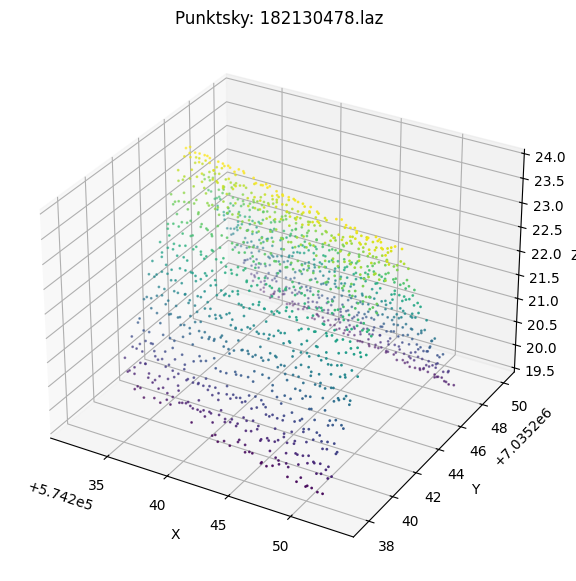

{'182130478.laz': {'point_count': 1431}}


In [9]:
#Leser filer fra eksempelmappen og plotter punktskyene- ser at vi får tak 


folder = "sample_roofdata_50"

# Opprett en tom dictionary for å lagre informasjonen
roofs_dict = {}

# Gå gjennom filene i mappen
for roof in os.listdir(folder):
    if roof.endswith(".laz"):
        # Lag hele filstien ved å kombinere mappen og filnavnet
        file_path = os.path.join(folder, roof)
        
        # Åpne .laz-filen og hent informasjon
        with lp.open(file_path, laz_backend=lp.LazBackend) as fh:
            point_count = fh.header.point_count
          
            
            
            # Legg til informasjon i dictionary
            roofs_dict[roof] = {
                "point_count": point_count
            }

            las_data = fh.read()
            x = las_data.x
            y = las_data.y
            z = las_data.z
            

        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x, y, z, s=1, c=z, cmap='viridis')  # s=1 betyr små punkter, c=z farger punktene basert på høyde
        ax.set_title(f"Punktsky: {roof}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.show()
        break #hvis du vil se alle 50 takene, fjern denne 


# Skriv ut dictionary for å verifisere
print(roofs_dict)

In [2]:
##kjapt generert for mer info


import os
import laspy as lp
import matplotlib.pyplot as plt

folder = "sample_roofdata_50"

# Opprett en tom dictionary for å lagre informasjonen
roofs_dict = {}

# Gå gjennom filene i mappen
for roof in os.listdir(folder):
    if roof.endswith(".laz"):
        # Lag hele filstien
        file_path = os.path.join(folder, roof)
        
        # Åpne .laz-filen og hent informasjon
        with lp.open(file_path, laz_backend=lp.LazBackend) as fh:
            header = fh.header
            point_count = header.point_count
            
            # Hent header-informasjon
            roofs_dict[roof] = {
                "file_path": file_path,
                "point_count": point_count,
                "version": f"{header.version.major}.{header.version.minor}",
                "point_format": header.point_format.id,
                "scale": header.scales,
                "offset": header.offsets,
                "min_bounds": header.mins,
                "max_bounds": header.maxs,
                "z-høyde": header.maxs[2],

            }
            
            # Les punktskydata
            laz_data = fh.read()
            x = laz_data.x
            y = laz_data.y
            z = laz_data.z

            ground_classification = laz_data.lasground
            print(ground_classification)
            #intensity = las_data.intensity if "intensity" in las_data.point_format else None
            #classification = las_data.classification if "classification" in las_data.point_format else None
            
            
        ## Plot punktsky i 3D
        #fig = plt.figure(figsize=(10, 7))
        #ax = fig.add_subplot(111, projection='3d')
        #scatter = ax.scatter(x, y, z, s=1, c=z, cmap='viridis')  # Fargepunkter basert på Z
        #ax.set_title(f"Punktsky: {roof}")
        #ax.set_xlabel("X")
        #ax.set_ylabel("Y")
        #ax.set_zlabel("Z")
        #plt.colorbar(scatter, label="Høyde (Z)")
        #plt.show()
        #
        #break  # Fjern denne hvis du vil visualisere alle filer

# Skriv ut innhentet informasjon
import pprint
pprint.pprint(roofs_dict)

<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 1431 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 610 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 2762 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 3732 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 1463 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 2242 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 3642 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 3215 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 7653 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 4449 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 514 points, 0 vlrs)>
<LasData(1.2, point fmt: <PointFor

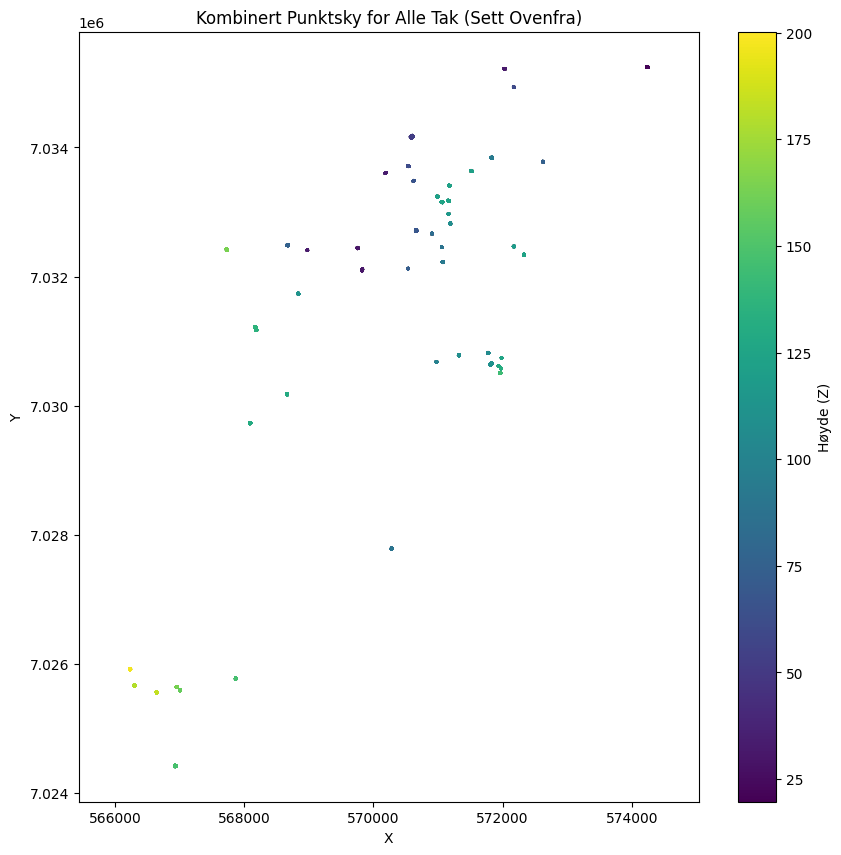

In [ ]:
import os
import laspy as lp
import matplotlib.pyplot as plt

folder = "sample_roofdata_50"

# Opprett lister for å samle alle punktene
all_x = []
all_y = []
all_z = []

# Gå gjennom filene i mappen
for roof in os.listdir(folder):
    if roof.endswith(".laz"):
        # Lag hele filstien ved å kombinere mappen og filnavnet
        file_path = os.path.join(folder, roof)
        
        # Åpne .laz-filen og les punktene
        with lp.open(file_path, laz_backend=lp.LazBackend) as fh:
            las_data = fh.read()
            x = las_data.x
            y = las_data.y
            z = las_data.z
            
            # Legg punktene til samlelistene
            all_x.extend(x)
            all_y.extend(y)
            all_z.extend(z)

# Plot alle takene i 2D (ovenfra)
plt.figure(figsize=(10, 10))
scatter = plt.scatter(all_x, all_y, c=all_z, s=1, cmap='viridis')  # Farger basert på høyde (z)
plt.title("All roofs in 2D")
plt.xlabel("X")
plt.ylabel("Y")

# Legg til en fargeskala for høyden
cbar = plt.colorbar(scatter)
cbar.set_label("Høyde (Z)")

plt.axis('equal')  # Sikrer at aksene har samme skala
plt.show()

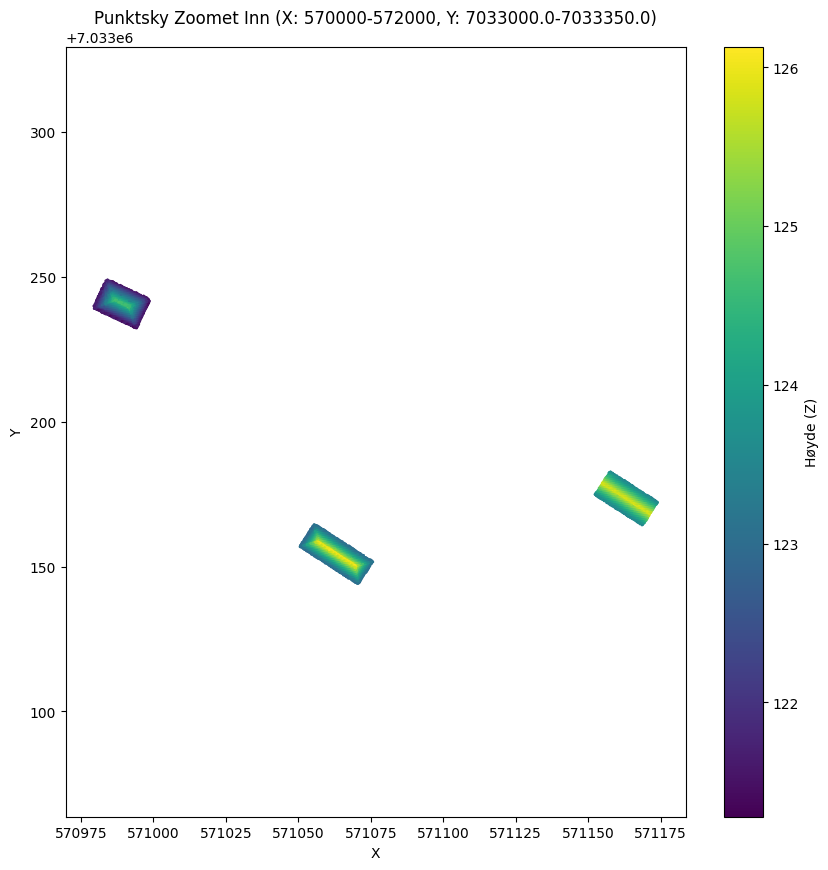

In [ ]:
import os
import laspy as lp
import matplotlib.pyplot as plt

folder = "sample_roofdata_50"

# Opprett lister for å samle alle punktene
all_x = []
all_y = []
all_z = []

# Gå gjennom filene i mappen
for roof in os.listdir(folder):
    if roof.endswith(".laz"):
        # Lag hele filstien ved å kombinere mappen og filnavnet
        file_path = os.path.join(folder, roof)
        
        # Åpne .laz-filen og les punktene
        with lp.open(file_path, laz_backend=lp.LazBackend) as fh:
            las_data = fh.read()
            x = las_data.x
            y = las_data.y
            z = las_data.z
            
            # Legg punktene til samlelistene
            all_x.extend(x)
            all_y.extend(y)
            all_z.extend(z)

# Definer området du vil zoome inn på
x_min, x_max = 570000, 572000  # Juster disse verdiene for ditt område
y_min, y_max = 7.0330e6, 7.03335e6

# Filtrer punkter som faller innenfor området
zoom_x = [x for x, y in zip(all_x, all_y) if x_min <= x <= x_max and y_min <= y <= y_max]
zoom_y = [y for x, y in zip(all_x, all_y) if x_min <= x <= x_max and y_min <= y <= y_max]
zoom_z = [z for x, y, z in zip(all_x, all_y, all_z) if x_min <= x <= x_max and y_min <= y <= y_max]

# Plot punktene i zoom-området
plt.figure(figsize=(10, 10))
scatter = plt.scatter(zoom_x, zoom_y, c=zoom_z, s=1, cmap='viridis')  # Farger basert på høyde (z)
plt.title(f"All roofs, zoomed in")
plt.xlabel("X")
plt.ylabel("Y")

# Legg til en fargeskala for høyden
cbar = plt.colorbar(scatter)
cbar.set_label("Høyde (Z)")

plt.axis('equal')  # Sikrer at aksene har samme skala
plt.show()